### Purpose:
The purpose of the algorithm is not to generate the same graph but to generate a pruned graph that only includes the most important nodes based on their <b>Eigen Vector Centrality</b> scores. Eigen Vector Centrality is helpful for this because <b>it measures the importance of a node in a network by considering not only its direct connections, but also the importance of the nodes it is connected to</b>. This allows us to identify the most influential nodes in the network, which can be useful for various applications such as identifying key players in a social network or detecting important genes in a biological network.

#### Concept:  
To understand this concept better, consider a social network where the nodes represent people and the edges represent friendships. If a person is friends with many other people who are themselves well-connected, that person is likely to have a high Eigen Vector Centrality score because they are connected to other important people in the network. On the other hand, if a person is friends with only a few people who are not well-connected, their Eigen Vector Centrality score will be lower.

In [121]:
import networkx as nx
import matplotlib.pyplot as plt
import similarity as sm

### Description of **enhance_graph_by_eigen_vector_centrality(G, threshold)**:  
Enhances a graph by reducing it based on Eigen Vector Centrality scores.

This function computes the Eigen Vector Centrality scores for all nodes in the graph `G`
using the `eigenvector_centrality` function from the NetworkX library.

The function then sorts the centrality dictionary in ascending order based on the centrality scores.
It calculates the number of nodes to keep based on the specified threshold percentage. Only the top
'num_nodes_to_keep' nodes with the highest Eigen Vector Centrality scores are considered important.

- The function generates a reduced graph that only includes the important nodes and their corresponding edges.  
- The reduced graph is a subgraph of the original graph `G`. It also returns the set of removed nodes.

### <u>Parameters</u>
**G** : NetworkX graph - The input graph.  
**threshold** : float - The percentage of nodes to retain based on Eigen Vector Centrality scores.
    Should be in the range [0, 1].  

### <u>Returns</u>
**reduced_graph** : NetworkX graph - The reduced graph that includes the important nodes and their corresponding edges.  
**removed_nodes** : set - The set of removed nodes that were not included in the reduced graph.

### <u>Notes</u>
Eigen Vector Centrality is a measure of the importance of a node in a network. It assigns
a score to each node based on its connections to other important nodes in the network.  
The function relies on the NetworkX library's `eigenvector_centrality` function for computing
the Eigen Vector Centrality scores.

In [122]:
def enhance_graph_by_eigen_vector_centrality(G, threshold):
    # Computes the Eigen Vector Centrality scores for all nodes in the graph G
    # using the eigenvector_centrality function from the NetworkX library.
    # The result is a dictionary that maps each node to its corresponding Eigen Vector Centrality score.
    centrality = nx.eigenvector_centrality(G)

    # Sort the centrality dictionary in ascending order based on the centrality scores.
    sorted_centralities = sorted(centrality.items(), key=lambda x: x[1])

    # Calculate the number of nodes to keep based on the specified threshold percentage.
    num_nodes_to_keep = int(len(sorted_centralities) * threshold)

    # Get the important nodes by retaining the top 'num_nodes_to_keep' nodes with highest eigen vector centrality.
    important_nodes = [node for node, _ in sorted_centralities[-num_nodes_to_keep:]]

    # Generate the reduced graph that only includes the important nodes and their corresponding edges.
    reduced_graph = G.subgraph(important_nodes)

    # Get the removed nodes as a set.
    removed_nodes = set(G.nodes) - set(important_nodes)

    return reduced_graph, removed_nodes


### Description of **draw_graph(graph)**:
Draws a graph using the NetworkX library and Matplotlib.

This function visualizes the given graph using the `draw_networkx` function from the NetworkX library. The graph is rendered using a spring layout algorithm with a specified value for the `k` parameter.

The function creates a Matplotlib figure and axes with a specified size, `figsize=(6, 6)`. It then calls `draw_networkx` with the following parameters:
- `graph`: The input graph to be visualized.
- `pos`: The layout algorithm to position the nodes. In this case, the spring layout algorithm is used with a `k` value of 0.3.
- `with_labels=True`: Specifies that node labels should be displayed.
- `node_size=100`: Sets the size of the nodes in the graph visualization.
- `font_size=10`: Sets the font size for node labels.
- `node_color='yellow'`: Sets the color of the nodes to yellow.
- `edge_color='black'`: Sets the color of the edges to black.
- `width=1.0`: Sets the width of the edges.
- `alpha=0.7`: Sets the transparency of the nodes and edges.
- `ax=ax`: Specifies the axes where the graph should be drawn.

### <u>Parameters</u>
**graph**: NetworkX graph - The input graph to be visualized.

### <u>Returns</u>
None

### <u>Notes</u>
The function relies on the NetworkX library's `draw_networkx` function to render the graph visualization. It also uses the Matplotlib library to create the figure and axes for the visualization. The resulting graph visualization provides a visual representation of the nodes and edges in the input graph.

In [123]:
def draw_graph(graph):
    fig, ax = plt.subplots(figsize=(6, 6))
    nx.draw_networkx(graph, pos=nx.spring_layout(graph, k=0.3), with_labels=True, node_size=100,font_size=10, node_color='yellow', edge_color='black', width=1.0, alpha=0.7, ax=ax)

Number of nodes: 924
Number of edges: 3239


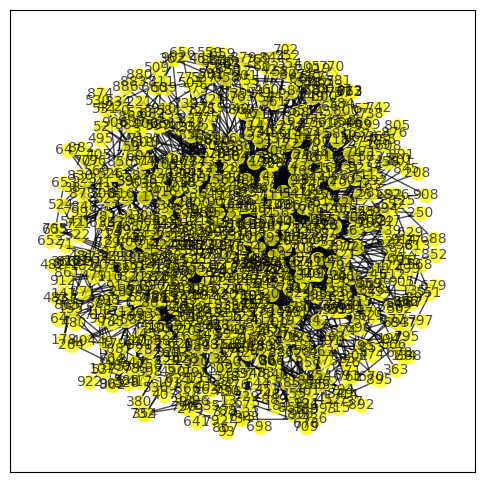

In [124]:
# Load Karate Club graph model
import networkx as nx
with open('bio_sample.edges', 'r') as file:
    edges = [line.strip().split()[:2] for line in file]
graph = nx.Graph()
for edge in edges:
    node1, node2 = edge
    graph.add_edge(node1, node2)
print("Number of nodes:", graph.number_of_nodes())
print("Number of edges:", graph.number_of_edges())
G = graph
original_graph=G.copy()
draw_graph(G)

In [125]:
reduced_graph,removed_nodes=enhance_graph_by_eigen_vector_centrality(G,0.1)

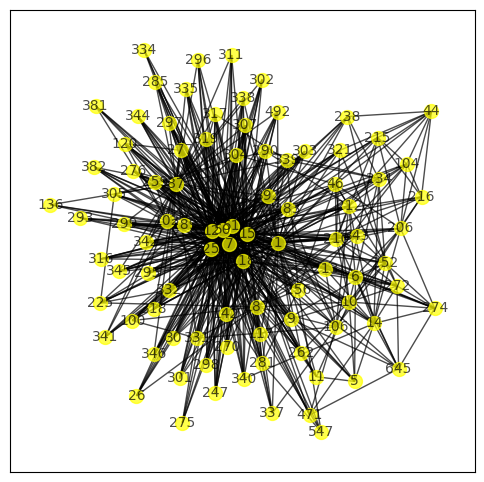

In [126]:
# Visualize the pruned graph
draw_graph(reduced_graph)

In [127]:
"""Calculating the similarity between the Graphs with respect to the parameter 'Betweenness Centrality'"""
print('Similarity of Betweenness Centrality is ',sm.compare_betweenness_centrality(original_graph,reduced_graph,removed_nodes),'%')

Similarity of Betweenness Centrality is  99.78 %


In [128]:
"""Calculating the similarity between the Graphs with respect to the parameter 'Degree Distribution'"""
print('Similarity of Degree Distribution is ',sm.compare_degree_distributions(original_graph,reduced_graph),'%')

Similarity of Degree Distribution is  98.72 %


In [129]:
"""Calculating the similarity between the Graphs with respect to the parameter 'Clustering Coefficient'"""
print('Similarity of Clustering Coefficient is ',sm.compare_clustering_coefficient(original_graph,reduced_graph),'%')

Similarity of Clustering Coefficient is  98.57 %


In [130]:
"""Calculating the similarity between the Graphs with respect to the parameter 'Eigen Vector Centrality'"""
print('Similarity of Eigen Vector Centrality is ',sm.compare_eigen_vector_centrality(original_graph,reduced_graph),'%')

Similarity of Eigen Vector Centrality is  99.88 %


In [131]:
"""Calculating the similarity between the Graphs with respect to the parameter 'Average Path Length'"""
print('Similarity of Average Path Length is ',sm.compare_average_path_length(original_graph,reduced_graph),'%')

Similarity of Average Path Length is  49.0 %


In [132]:
"""Calculating the Jaccard similarity between the Graphs with respect to the parameter 'Average Path Length'"""
print('Jaccard Similarity is ',sm.calculate_jaccard_similarity(original_graph,reduced_graph),'%')

Jaccard Similarity is  99.84 %
